In [31]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test =  datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size= 10, shuffle = True)
testset = torch.utils.data.DataLoader(train, batch_size= 10, shuffle = True)


In [32]:
import torch.nn as nn
import torch.nn.functional as F 

In [33]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,64)# fc is fully connected
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)
        
        return x
        
        
net = Net()
print(net)
        
    

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [34]:
X = torch.rand((28,28))
X = X.view(1,28*28)
X

tensor([[3.5160e-02, 4.8033e-01, 5.1215e-01, 9.9835e-01, 8.0400e-01, 5.6946e-01,
         4.6884e-03, 1.5324e-01, 3.6373e-01, 7.3482e-01, 5.7010e-01, 6.5211e-01,
         9.3239e-01, 6.8211e-01, 7.6332e-01, 8.2211e-01, 3.7656e-01, 7.0561e-01,
         9.4108e-01, 1.4873e-01, 2.8745e-01, 8.9300e-01, 1.7473e-01, 4.0431e-01,
         5.9835e-01, 6.8690e-01, 1.3741e-02, 6.5144e-01, 1.9525e-01, 1.7623e-01,
         4.8626e-01, 8.6311e-01, 1.9035e-01, 7.6706e-01, 9.3983e-01, 6.8862e-01,
         8.4841e-01, 8.6652e-01, 9.8221e-01, 9.0184e-01, 2.2329e-01, 2.3558e-01,
         2.4607e-01, 1.7024e-01, 3.4858e-02, 9.7929e-01, 8.8088e-01, 2.4926e-01,
         3.9379e-01, 2.3618e-01, 1.1617e-02, 7.4060e-01, 2.5358e-01, 7.8895e-01,
         4.7743e-01, 6.3027e-01, 8.6936e-02, 7.5473e-01, 7.6984e-01, 1.6389e-01,
         5.2979e-01, 7.8717e-01, 3.2457e-01, 2.4835e-01, 7.0774e-01, 1.5322e-01,
         8.5776e-01, 4.9046e-01, 1.3789e-01, 1.6400e-01, 7.0841e-01, 4.4326e-01,
         6.5946e-01, 9.3699e

In [35]:
output = net(X)
output

tensor([[-2.3192, -2.4110, -2.4151, -2.1682, -2.2570, -2.2495, -2.2272, -2.4674,
         -2.3223, -2.2314]], grad_fn=<LogSoftmaxBackward>)

In [36]:
#PART 4

In [41]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # datat is a batch of featuresets and labels
        X,y = data
        #everytime before you pass data through your neural network
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()#backprop
        optimizer.step()
    print(loss)
    

tensor(0.0297, grad_fn=<NllLossBackward>)
tensor(0.1027, grad_fn=<NllLossBackward>)
tensor(0.0107, grad_fn=<NllLossBackward>)


In [58]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y =data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", round(correct/total,3))
            

Accuracy: 0.991


<function matplotlib.pyplot.show(*args, **kw)>

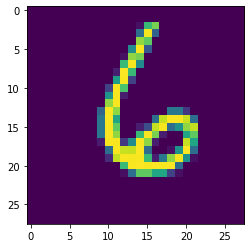

In [59]:
import matplotlib.pyplot as plt
plt.imshow(X[9].view(28,28))
plt.show

In [60]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(6, grad_fn=<NotImplemented>)
